<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matrix multiplication</a></span></li><li><span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conversion algorithm</a></span></li><li><span><a href="#Algorithm-verification" data-toc-modified-id="Algorithm-verification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm verification</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Protection of clients personal data

We need to protect the data of customers of the insurance company . Develop a data transformation method that makes it difficult to recover personal information from it. Justify the correctness of his work.

The quality of the machine learning models does not deteriorate during the transformation. 

+ The dataset is insurance.csv file.
+ Features: gender, age and salary of the insured, the number of members of his family.
+ Target: the number of insurance payments to the client over the past 5 years.

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import phik
from phik.report import plot_correlation_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
data.duplicated().sum()

153

In [6]:
data.drop_duplicates(inplace=True)

- No missing values.
- Checked for duplicates, found 153 and deleted.
- No outliers detected.

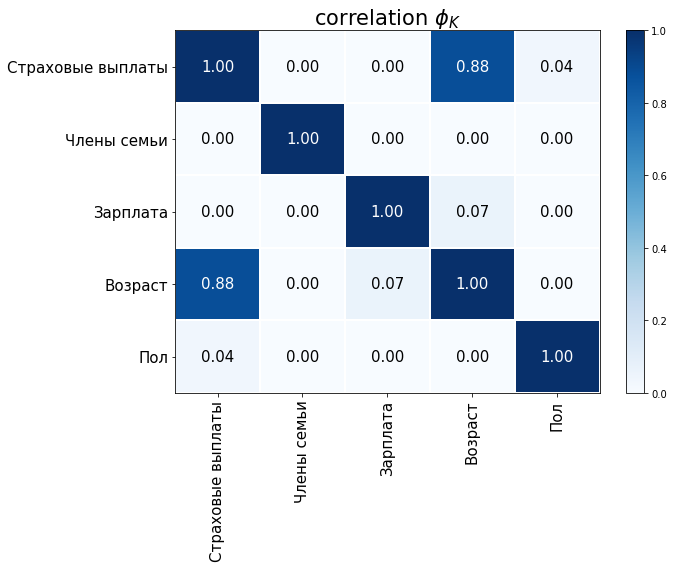

In [7]:
interval_cols = ['Возраст', 'Зарплата', 'Члены семьи']
phik_overview = data.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Check the data for multicollinearity with the Phik tool. There are no faeatures that would correlate. However, a strong correlation between age and the target can be noted.

## Matrix multiplication

Designations:

- $X$ — matrix of features (zero column consists of ones)

- $y$ — target feature vector

- $P$ — the matrix by which the features are multiplied

- $w$ — vector of linear regression weights (zero element is equal to shift)

Prediction:

$$
a = Xw
$$

Learning task:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning Formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** The quality of the model will not change.

**Обоснование:** Prove that the quality of the model does not change when multiplied by any invertible matrix M.

New matrix of features 
$$
X' = XM
$$

Learning Formula 

$$
w = (X^T X)^{-1} X^T y
$$

New learning Formula

$$
w' = (X'^T X')^{-1} X'^T y = ((XM)^T XM)^{-1} (XM)^T y
$$

Open the brackets and transform the expression:

$$
w' = (M^T (X^T X) M)^{-1} M^T X^T y
$$
$$
w' = M^{-1} (X^T X)^{-1} (M^T)^{-1} M^T X^T y
$$

By assumption, M is an invertible matrix => $$ M^T(M^T)^{-1} = (M^T)^{-1} M^T = E $$

Then the learning formula takes the form:

$$
w' = M^{-1}(X^T X)^{-1} E X^T y = M^{-1}(X^T X)^{-1} X^T y
$$

$$
w' = M^{-1} w 
$$

Substitute the new value of the weights into the formula for calculating the prediction:
$$
a = Xw
$$
$$
a' = X'w'
$$
We substitute the expression w' in terms of w and the matrix M and express the feature matrix X' in terms of X and M:
$$
a' = X M M^{-1} w  = X E w = X w
$$

$$
a' = a
$$

**Predictions a' for the feature matrix X multiplied by the invertible matrix M are equal to the predictions a. Therefore, when multiplying features by an invertible matrix, the quality of linear regression will not change.**

## Conversion algorithm

**Algorithm**

- Create a random matrix.
- Check it for reversibility.
- Multiply by features.
- Find the metrics of the trained model on the original features and on the features multiplied by the matrix.
- Compare metrics with each other. If they are equal, then the task is completed.

`Xw = XMw`


## Algorithm verification

In [8]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

In [9]:
linear_model = LinearRegression()
linear_model.fit(X, y)
norm_predictions = linear_model.predict(X)
norm_score = r2_score(y, norm_predictions)
print('R2 for original data:', norm_score)

R2 for original data: 0.4302010044852066


**Apply the conversion algorithm**

In [10]:
random_matrix = np.random.normal(0, 1, (X.shape[1], X.shape[1]))
random_matrix

array([[-0.36934246,  1.67028292,  0.73132916, -0.04647882],
       [ 0.45302221,  0.74548714,  1.07462642,  0.58061663],
       [ 1.42425648,  1.31338655, -0.00856318,  0.03514064],
       [-0.70400162,  0.35521626, -0.10107082, -0.9887654 ]])

In [11]:
np.linalg.inv(random_matrix)

array([[-0.72905317,  0.53484456,  0.52433187,  0.36697334],
       [ 0.76300137, -0.55079775,  0.19895351, -0.35223157],
       [-0.68855489,  1.48167589, -0.2074234 ,  0.89505549],
       [ 0.86357989, -0.73014078, -0.28064748, -1.49067939]])

In [12]:
encoded_X = X @ random_matrix

In [13]:
enc_linear_model = LinearRegression()
enc_linear_model.fit(encoded_X, y)
enc_predictions = enc_linear_model.predict(encoded_X)
enc_score = r2_score(y, enc_predictions)
print('R2 on conversed data:', enc_score)

R2 on conversed data: 0.4302010044852038


The quality of the linear regression model has not changed.

The proposed data transformation algorithm copes with the task of feature encryption.

## Conclusions

- By multiplying the features by an invertible matrix, the quality of the linear regression does not change.

- The proposed data conversion algorithm solves the problem of protecting user data.

- Encrypted data is fully suitable for predictions using linear regression.

- Due to the random choice of the matrix, it will be very difficult to restore personal information without the source code.
